OSIsoft Cloud Services interpolation and extrapolation example with stream views

Requirements:
1. Juptyer notebook or lab
2. Python
3. custom_ocs_sample_library
   Note: this notebook uses a customized version of the Python library, some of these features are not yet in the github library:
   https://github.com/osisoft/OSI-Samples/tree/master/ocs_samples/library_samples/Python3
4. config.ini configured for your OSIsoft Cloud Services environment
   https://github.com/osisoft/OSI-Samples/tree/master/ocs_samples/basic_samples/SDS/Python/SDSPy/Python3
5. Familiarity with namespaces, types and streams,  see https://cloud.osisoft.com

Objectives:
1. Create types and streams to explore interpolation and extrapolation features.

In [1]:
# specify a unique prefix to create objects, suggestion use your nickname
example_prefix = 'SDSpolation1.'

# run a fork-ed/edited version of the OSIsoft Python library to support *polation
custom_ocs_library = True
   
# setup the environment, using statements defined in a python script file   
%run -i setup

Create a type

In [2]:
# If you want to see the web request uncomment the following two lines
#logger.setLevel(logging.DEBUG)
#logging.debug("tap")

In [3]:

# Dictionary to describe information about the type to  be created
thetype = {'sdstypecode': SdsTypeCode.Object, # type of SDS object
           'id': f'{example_prefix}object1', # unique identifier for the stream
           'name': 'bearing_channel', # descritive name
           'description': 'no interpolation or extrapolation'}

# data type
double_type = SdsType()
double_type.Id = "Double"
double_type.SdsTypeCode = SdsTypeCode.Double

# sds type property
timestamp_property = SdsTypeProperty()
timestamp_property.Id = "timestamp"
timestamp_property.SdsType = SdsType.fromDictionary({"SdsTypeCode": SdsTypeCode.DateTime.value})
timestamp_property.IsKey = True

# sds type property
counter_property = SdsTypeProperty()
counter_property.Id = "counter"
counter_property.SdsType = SdsType.fromDictionary({"SdsTypeCode": SdsTypeCode.Decimal.value})

# sds type property
channel_property =  SdsTypeProperty()
channel_property.Id = "channel"
channel_property.SdsType = SdsType.fromJson({"SdsTypeCode" : SdsTypeCode.Double.value })

# sds type defintion
bearing = SdsType()
bearing.Id = thetype['id']
bearing.SdsTypeCode = thetype['sdstypecode']
bearing.Name = thetype['name']
bearing.Description=thetype['description']
bearing.Properties = [timestamp_property,counter_property,channel_property]

# Create the type
try:
    bearing_type = ocsClient.Types.getOrCreateType(namespace_id, bearing)
except:
    bearing_type = ocsClient.Types.getType(namespace_id,bearing.Id)
ocsClient.acceptverbosity = True  # return values that are default values. By default these are not returned
print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

{
    "SdsTypeCode": 1,
    "Properties": [
        {
            "Id": "timestamp",
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 16,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": null,
                "InterpolationMode": null
            },
            "Value": null,
            "Order": null,
            "IsKey": true,
            "InterpolationMode": null,
            "Uom": null
        },
        {
            "Id": "counter",
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 15,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": null,
                "InterpolationMode": null
            },
            "Value": null,
            "Order": null,
            "IsKey": false,
            "InterpolationMode": null,
            "Uom": null


Create a second type, specifying the interpolation mode for the counter property

In [4]:
# for this step we just update/add to the previous type defintion to create the new type

thetype['id'] = f'{example_prefix}object2' # unique identifier for the stream
thetype['description'] = 'interpolation example'

counter_property.InterpolationMode = SdsStreamMode.StepwiseContinuousLeading.value
bearing.Id = thetype['id']

try:
    bearing_type = ocsClient.Types.getOrCreateType(namespace_id, bearing)
except:
    bearing_type = ocsClient.Types.getType(namespace_id,bearing.Id)
ocsClient.acceptverbosity = True
print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

{
    "SdsTypeCode": 1,
    "Properties": [
        {
            "Id": "timestamp",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 16,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": true,
            "InterpolationMode": null,
            "Uom": null
        },
        {
            "Id": "counter",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 15,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": false,
            "InterpolationMod

Create a third type, specifying the extrapolation mode for the type

In [5]:
# for this step we just update/add to the previous type defintion to create the new type

thetype['id'] = f'{example_prefix}object3' # unique identifier for the stream
thetype['description'] = 'interpolation and extrapolaltion example'

bearing.Id = thetype['id']
bearing.ExtrapolationMode = SdsStreamExtrapolation.Nonex.value

try:
    bearing_type = ocsClient.Types.getOrCreateType(namespace_id, bearing)
except:
    bearing_type = ocsClient.Types.getType(namespace_id,bearing.Id)
ocsClient.acceptverbosity = True
print(json.dumps(json.loads(bearing_type.toJson()), indent=4))

{
    "SdsTypeCode": 1,
    "Properties": [
        {
            "Id": "timestamp",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 16,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": true,
            "InterpolationMode": null,
            "Uom": null
        },
        {
            "Id": "counter",
            "Name": null,
            "Description": null,
            "SdsType": {
                "SdsTypeCode": 15,
                "Id": null,
                "Name": null,
                "Description": null,
                "ExtrapolationMode": 0,
                "InterpolationMode": 0
            },
            "Value": null,
            "Order": 0,
            "IsKey": false,
            "InterpolationMod

In [6]:
# Create a stream for each of the defined types
for bearing in range(1,4):
    # If you want to recreate/modify the dataset by deleting/re-creating the stream:
    # ocsClient.Streams.deleteStream(namespace_id,f'{example_prefix}bearing{bearing}')
    sds_stream = SdsStream(id=f'{example_prefix}bearing{bearing}',name=f'bearing{bearing}', description=f'Bearing {bearing} Channel 1', typeId=f'{example_prefix}object{bearing}')
    try:
        stream = ocsClient.Streams.getOrCreateStream(namespace_id,sds_stream)
    except:
        stream = ocsClient.Streams.getStream(namespace_id,f'{example_prefix}bearing{bearing}')
    print(f'id: {stream.Id}, name: {stream.Name}, type: {stream.TypeId}')

id: SDSpolation1.bearing1, name: bearing1, type: SDSpolation1.object1
id: SDSpolation1.bearing2, name: bearing2, type: SDSpolation1.object2
id: SDSpolation1.bearing3, name: bearing3, type: SDSpolation1.object3


In [7]:
# define a set of values
# create stream events
values = [ {'timestamp': '2004-02-19T06:19:00Z', 'counter': 0, 'channel': -0.872},
           {'timestamp': '2004-02-19T06:21:00Z', 'counter': 1, 'channel': 0.002},
           {'timestamp': '2004-02-19T06:23:00Z', 'counter': 2, 'channel': -0.438},
           {'timestamp': '2004-02-19T06:25:00Z', 'counter': 3, 'channel': 0.222},
           {'timestamp': '2004-02-19T06:27:00Z', 'counter': 4, 'channel': 0.678}]

# Create values for each of the streams
for bearing in range(1,4):
    # insert values
    try:
        ocsClient.Streams.insertValues(namespace_id,f'{example_prefix}bearing{bearing}',json.dumps(values))
    except Exception as e:
        print(f'Unable to add stream events: {e}')

In [8]:
# setup variables for use in queries
start_time = '2004-02-19T06:14:00Z'
end_time = '2004-02-19T06:30:00Z'
start_datetime = (datetime.datetime.strptime(start_time,"%Y-%m-%dT%H:%M:%SZ"))
end_datetime = (datetime.datetime.strptime(end_time,"%Y-%m-%dT%H:%M:%SZ"))


In [21]:
# print all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# helper function to plot stream values
def plot_values(stream_number_suffix):
    ocsClient.acceptverbosity = True  # return values that are default values.By default 
    # these are not returned..
    # query for interpolated data using the first type created
    response = ocsClient.Streams.getRangeValuesInterpolated(namespace_id,
                                                            stream_id=f'{example_prefix}bearing{stream_number_suffix}',
                                                            value_class=None,
                                                            start=start_datetime,
                                                            end=end_datetime,
                                                            count=10)
    # put it in a dataframe and display
    df_result = pd.DataFrame.from_dict(response)
    df_result['timestamp'] = pd.to_datetime(df_result['timestamp'],infer_datetime_format=True)
    df_result.set_index('timestamp', inplace=True)
    print(df_result)
    sns.lineplot(data=df_result,markers=True)

                                      counter   channel
timestamp                                              
2004-02-19 06:14:00+00:00            0.000000 -0.872000
2004-02-19 06:15:46.666666600+00:00  0.000000 -0.872000
2004-02-19 06:17:33.333333200+00:00  0.000000 -0.872000
2004-02-19 06:19:19.999999800+00:00  0.166667 -0.726333
2004-02-19 06:21:06.666666400+00:00  1.055556 -0.022444
2004-02-19 06:22:53.333333+00:00     1.944444 -0.413556
2004-02-19 06:24:39.999999600+00:00  2.833333  0.112000
2004-02-19 06:26:26.666666200+00:00  3.722222  0.551333
2004-02-19 06:28:13.333332800+00:00  4.000000  0.678000
2004-02-19 06:30:00+00:00            4.000000  0.678000


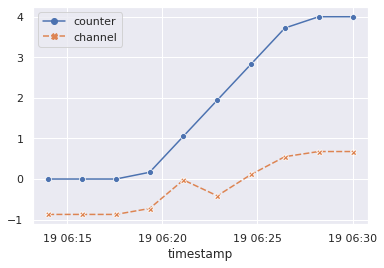

In [22]:
plot_values(1) # note values outside of dataset range and non-decimal counter values

                                     counter   channel
timestamp                                             
2004-02-19 06:14:00+00:00                0.0 -0.872000
2004-02-19 06:15:46.666666600+00:00      0.0 -0.872000
2004-02-19 06:17:33.333333200+00:00      0.0 -0.872000
2004-02-19 06:19:19.999999800+00:00      0.0 -0.726333
2004-02-19 06:21:06.666666400+00:00      1.0 -0.022444
2004-02-19 06:22:53.333333+00:00         1.0 -0.413556
2004-02-19 06:24:39.999999600+00:00      2.0  0.112000
2004-02-19 06:26:26.666666200+00:00      3.0  0.551333
2004-02-19 06:28:13.333332800+00:00      4.0  0.678000
2004-02-19 06:30:00+00:00                4.0  0.678000


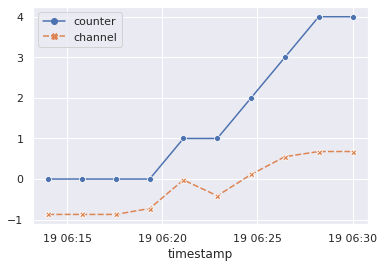

In [11]:
plot_values(2) # counter values are now decimal

                                     counter   channel
timestamp                                             
2004-02-19 06:19:19.999999800+00:00      0.0 -0.726333
2004-02-19 06:21:06.666666400+00:00      1.0 -0.022444
2004-02-19 06:22:53.333333+00:00         1.0 -0.413556
2004-02-19 06:24:39.999999600+00:00      2.0  0.112000
2004-02-19 06:26:26.666666200+00:00      3.0  0.551333


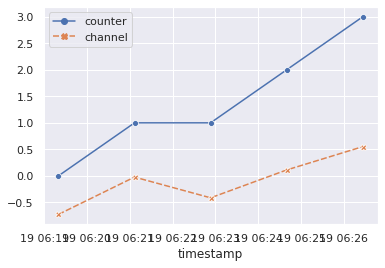

In [12]:
plot_values(3) # no values outside dataset range

In [13]:
# Exercise create a type, values and display values where the counter is discrete and there are no values outside of the dataset range

In [14]:
# Clean-up environment - delete type and streams with {example_prefix} prefix defined earlier
# Note: don't do this if you plan to run subsequent notebooks in this "group"

def cleanup(run=False):
        for stream in ocsClient.Streams.getStreams(namespace_id,f'{example_prefix}*'):
            print(f'stream id: {stream.Id}, stream name: {stream.Name}')
            if run:
                try:
                    ocsClient.Streams.deleteStream(namespace_id,stream.Id)
                except:
                    pass
        for type in ocsClient.Types.getTypes(namespace_id,query=f'{example_prefix}*'):
            print(f'type id: {type.Id}, type name: {type.Name}')
            if run:
                try:
                    ocsClient.Types.deleteType(namespace_id,type.Id)
                    ocsClient.Types.deleteType(namespace_id,type.TypeId)
                except:
                    pass
        
# cleanup - disabled, i.e: False and commented:
#cleanup(False)

In [23]:
!pip freeze > requirements.txt